In [1]:
import sys
import os
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import json
import joblib
from pprint import pprint
current_path = os.getcwd()
project_root = os.path.abspath(os.path.join(current_path, os.pardir, os.pardir))
print(project_root)
if project_root not in sys.path:
    sys.path.insert(0, project_root)

c:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project


In [4]:
# 25% signal thresh, h = 20
deeplob1_path = r"C:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\results\algo\AAPL\2025-06-04\20\25\DeepLOB\data_LKm4k2SNoj.joblib"
# deeplob2_path = r"C:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\results\algo\AAPL\2025-06-04\20\25\DeepLOB\data_RDpCrHnKC4.joblib"

# 5% signal thresh, h = 20
# deeplob1_path = r"C:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\results\algo\AAPL\2025-06-04\20\5\DeepLOB\data_i8kwWI40uz.joblib"
# deeplob2_path = r"C:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\results\algo\AAPL\2025-06-04\20\5\DeepLOB\data_MgKsmaoZEe.joblib"

# 25% signal thresh, h = 40
# deeplob1_path = r"C:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\results\algo\AAPL\2025-06-04\40\25\DeepLOB\data_BigYnYcEOx.joblib"
# deeplob2_path = r"C:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\results\algo\AAPL\2025-06-04\40\25\DeepLOB\data_k0WmZcaEW2.joblib"

deeplob1 = joblib.load(deeplob1_path)
# deeplob2 = joblib.load(deeplob2_path)
pprint(deeplob1)
# pprint(deeplob2)

{'directions': array([0., 0., 0., ..., 1., 1., 1.]),
 'fees': None,
 'lower_thresh': -0.1762625053524971,
 'meta': {'date': '2025-06-04',
          'horizon': 20,
          'modelClass': <class 'src.algo.algoModels.deepLOB.DeepLOB'>,
          'representation': 'orderflows',
          'rowLim': 100000,
          'saveResults': True,
          'signalPercentage': 25,
          'ticker': 'AAPL',
          'tradingFees': False,
          'windowLength': 100},
 'pnl': array([0.   , 0.   , 0.   , ..., 1.225, 1.225, 1.225]),
 'predictions': array([0.32231289, 0.        , 0.0331631 , ..., 0.17588429, 0.20648271,
       0.23020425]),
 'upper_thresh': 0.38457995653152466}


In [6]:
AAPL_data_path = r"C:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\results\csv_outputs\slippageData_AAPL.csv"
AAPL_data = pd.read_csv(AAPL_data_path)

99900


C:\Users\benhu\AppData\Local\Temp\ipykernel_69568\2238762534.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


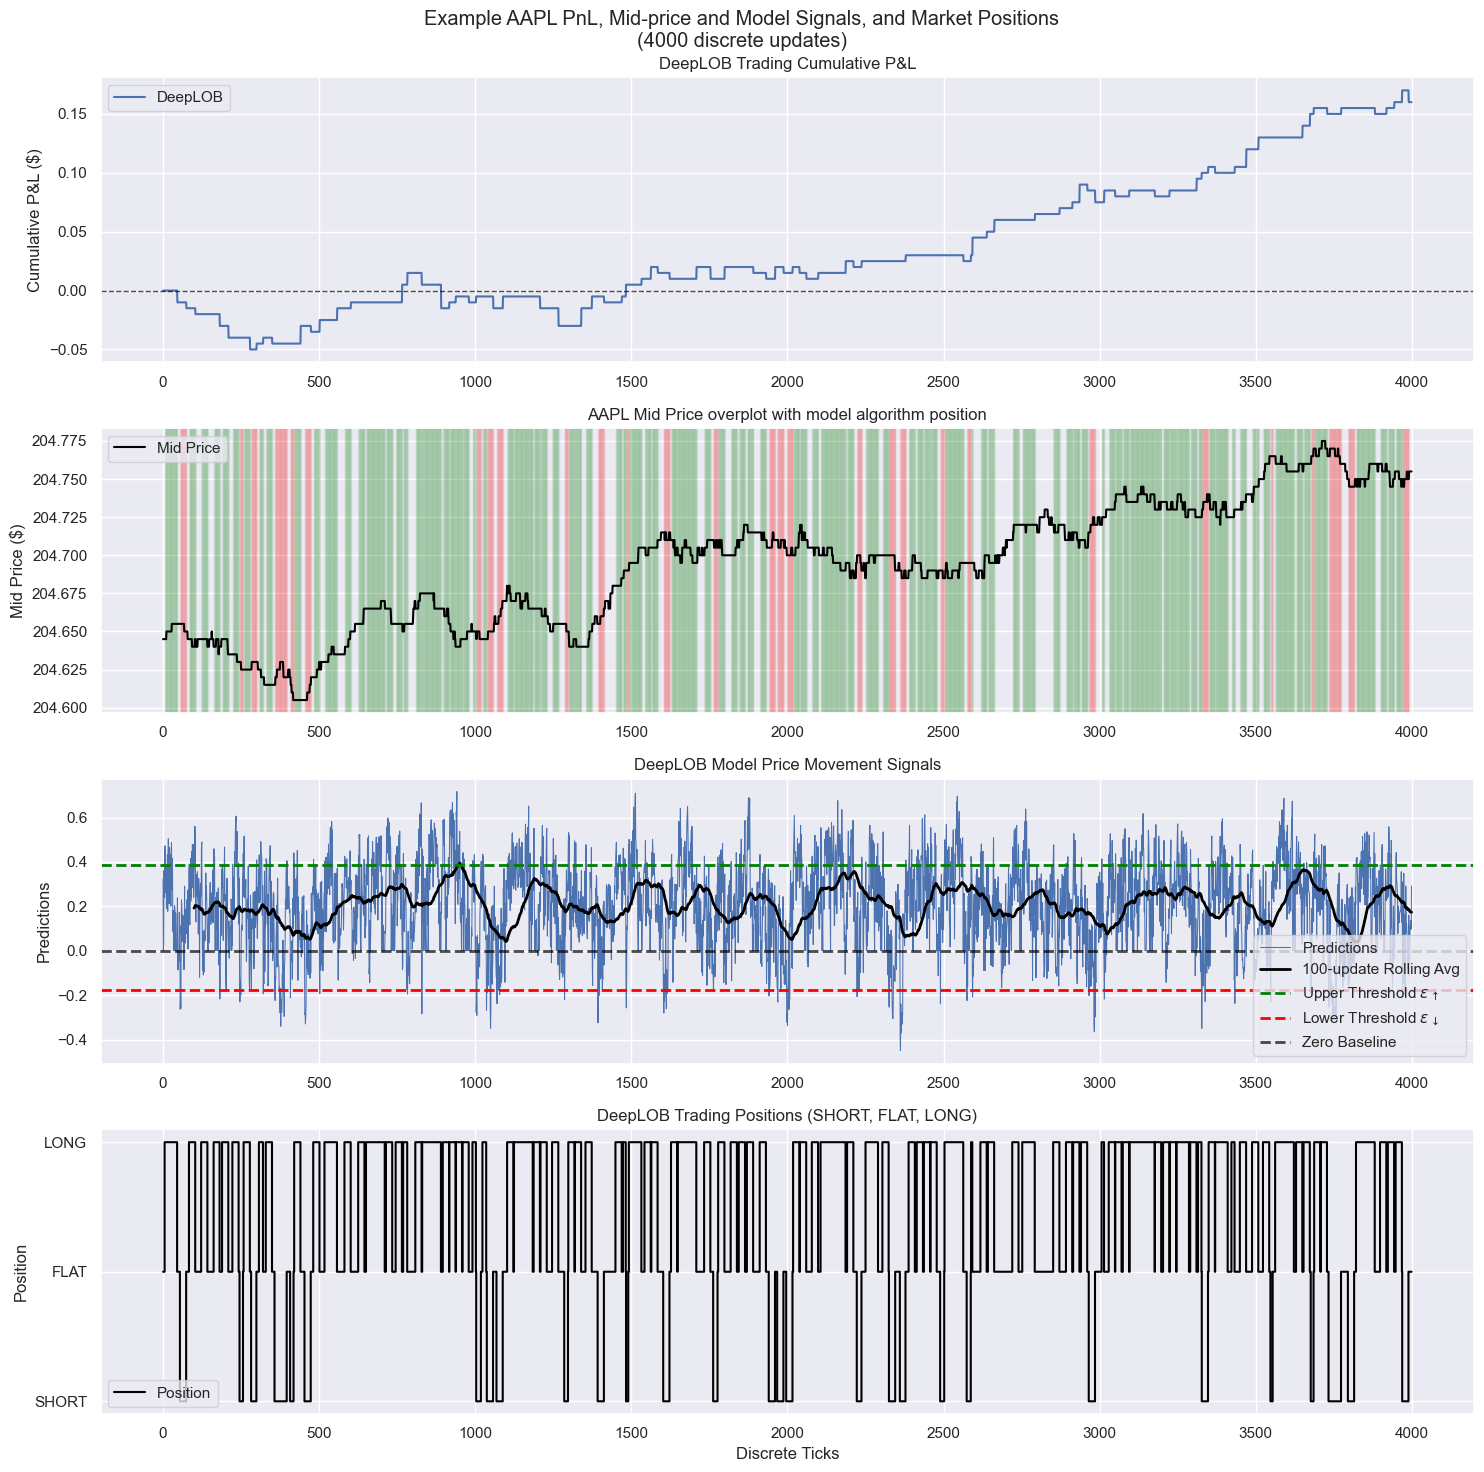

In [59]:
from matplotlib.patches import Patch

pnl1 = deeplob1['pnl']
rowLim = 4_000
print(len(pnl1))
# Plot DeepLOB trading decisions and price movements using loaded deeplob1/deeplob2 results

fig, axs = plt.subplots(4, 1, figsize=(15, 15), sharex=False)
sns.set()
# Plot 1: PnL curves for DeepLOB models


# Plot predictions with thresholds on the second subplot
preds = deeplob1['predictions']
directions = deeplob1['directions']
upper = deeplob1['upper_thresh']
lower = deeplob1['lower_thresh']

# Plot 1: PnL
axs[0].set_title(f'DeepLOB Trading Cumulative P&L')
axs[0].legend()
axs[0].grid(True, alpha=1)
axs[0].plot(pnl1[:rowLim], label='DeepLOB')
axs[0].set_ylabel('Cumulative P&L ($)')
axs[0].axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.7)
axs[0].legend()

# Plot 2: Price movement (mid price)
axs[1].plot(AAPL_data['mid'].values[:rowLim], color='black', alpha=1, label='Mid Price')
# Overlay shading for trading directions (no duplicate legend entries)
for i in range(rowLim):
    if directions[i] == 1:
        axs[1].axvspan(i, i+1, color='green', alpha=0.05)
        # axs[2].axvspan(i, i+1, color='green', alpha=0.05)
    elif directions[i] == -1:
        axs[1].axvspan(i, i+1, color='red', alpha=0.05)
        # axs[2].axvspan(i, i+1, color='red', alpha=0.05)

# Add custom legend handles for LONG and SHORT
handles = [
    Patch(facecolor='green', edgecolor='green', alpha=0.2, label='LONG'),
    Patch(facecolor='red', edgecolor='red', alpha=0.2, label='SHORT')
]
axs[1].legend(handles=handles)

axs[1].set_ylabel('Mid Price ($)')
axs[1].set_title('AAPL Mid Price overplot with model algorithm position')
axs[1].legend()
axs[1].grid(True, alpha=1)

# Plot 3: DeepLOB predictions
rolling_preds = pd.Series(preds[:rowLim]).rolling(window=100).mean()
axs[2].plot(preds[:rowLim], label='Predictions', linewidth=0.75,)
axs[2].plot(rolling_preds, label=f'{100}-update Rolling Avg', color='black', linewidth=2)
axs[2].set_ylabel('Predictions')
axs[2].set_title('DeepLOB Model Price Movement Signals')
axs[2].legend()
axs[2].grid(True, alpha=1)
axs[2].axhline(upper, color='green', linestyle='--', linewidth=2, label=r'Upper Threshold $\epsilon_{\uparrow}$')
axs[2].axhline(lower, color='red', linestyle='--', linewidth=2, label=r'Lower Threshold $\epsilon_{\downarrow}$')
axs[2].axhline(0, color='black', linestyle='--', linewidth=2, alpha=0.7, label='Zero Baseline')
axs[2].legend()

# axs[3].bar(np.arange(rowLim), directions[:rowLim], color='black', edgecolor='black', alpha=0.7)
axs[3].step(np.arange(rowLim), directions[:rowLim], color='black', alpha=1, label='Position')
axs[3].legend()
axs[3].set_ylabel('Position')
axs[3].set_yticks([-1, 0, 1])
axs[3].set_yticklabels(['SHORT', 'FLAT', 'LONG'])
axs[3].set_title('DeepLOB Trading Positions (SHORT, FLAT, LONG)')
axs[3].grid(True, alpha=1)

plt.suptitle(f'Example AAPL PnL, Mid-price and Model Signals, and Market Positions\n({rowLim} discrete updates)')


plt.xlabel('Discrete Ticks')
plt.tight_layout()
plt.show()

In [31]:
linreg1_path = r"C:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\results\algo\AAPL\2025-06-04\20\25\LinearRegressionModel\data_2ojJ2xUaWM.joblib"
linreg2_path = r"C:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\results\algo\AAPL\2025-06-04\20\25\LinearRegressionModel\data_SXOJQgE11F.joblib"

linreg1 = joblib.load(linreg1_path)
linreg2 = joblib.load(linreg2_path)
pprint(linreg1)
pprint(linreg2)

{'directions': array([0., 0., 0., ..., 0., 0., 0.]),
 'fees': None,
 'lower_thresh': -1.1266283073337136,
 'meta': {'date': '2025-06-04',
          'horizon': 20,
          'modelClass': <class 'src.algo.algoModels.linearRegression.LinearRegressionModel'>,
          'representation': 'orderflows',
          'rowLim': 100000,
          'saveResults': True,
          'signalPercentage': 25,
          'ticker': 'AAPL',
          'tradingFees': False,
          'windowLength': 100},
 'pnl': array([0.   , 0.   , 0.   , ..., 2.615, 2.615, 2.615]),
 'predictions': array([-0.60613279, -0.54435682, -0.48258085, ...,  1.10636546,
        1.11455877,  1.12026111]),
 'upper_thresh': 1.1487423552625802}
{'directions': array([0., 0., 0., ..., 0., 0., 0.]),
 'fees': array([0., 0., 0., ..., 0., 0., 0.]),
 'lower_thresh': -1.1266283073337136,
 'meta': {'date': '2025-06-04',
          'horizon': 20,
          'modelClass': <class 'src.algo.algoModels.linearRegression.LinearRegressionModel'>,
          '

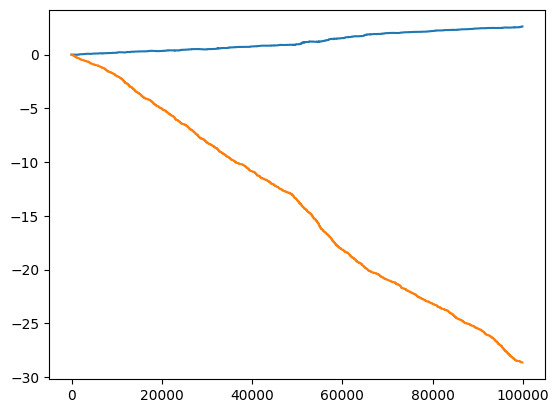

In [32]:
pnl1 = linreg1['pnl']
pnl2 = linreg2['pnl']
plt.plot(pnl1)
plt.plot(pnl2)
plt.show()

In [43]:
deeplobreg1_path = r"C:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\results\algo\AAPL\2025-06-04\40\25\DeepLOBREG\data_H3hRNCcsmb.joblib"
deeplobreg2_path = r"C:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\results\algo\AAPL\2025-06-04\40\25\DeepLOBREG\data_mDTi4ruJu4.joblib"

deeplobreg1 = joblib.load(deeplobreg1_path)
deeplobreg2 = joblib.load(deeplobreg2_path)
pprint(deeplobreg1)
pprint(deeplobreg2)

{'directions': array([0., 0., 0., ..., 1., 1., 1.]),
 'fees': array([0., 0., 0., ..., 0., 0., 0.]),
 'lower_thresh': -0.16348761320114136,
 'meta': {'date': '2025-06-04',
          'horizon': 40,
          'modelClass': <class 'src.algo.algoModels.deepLOBREG.DeepLOBREG'>,
          'representation': 'orderflows',
          'rowLim': 100000,
          'saveResults': True,
          'signalPercentage': 25,
          'ticker': 'AAPL',
          'tradingFees': True,
          'windowLength': 100},
 'pnl': array([  0.  ,   0.  ,   0.  , ..., -40.87, -40.87, -40.87]),
 'predictions': array([[ 0.11156013],
       [-0.03443267],
       [-0.00793423],
       ...,
       [ 0.2351351 ],
       [ 0.25986344],
       [ 0.2538323 ]], dtype=float32),
 'upper_thresh': 0.30289426445961}
{'directions': array([0., 0., 0., ..., 1., 1., 1.]),
 'fees': None,
 'lower_thresh': -0.16348761320114136,
 'meta': {'date': '2025-06-04',
          'horizon': 40,
          'modelClass': <class 'src.algo.algoModels.dee

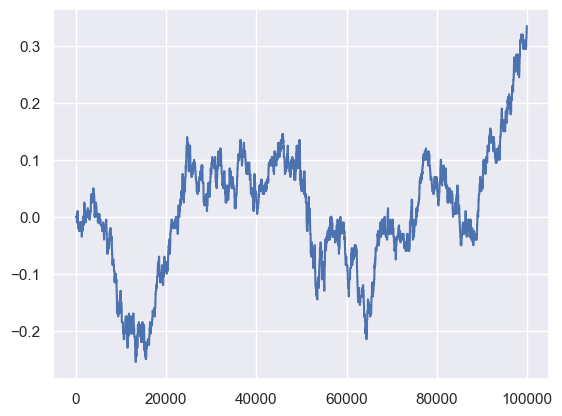

In [48]:
pnl1 = deeplobreg1['pnl']
pnl2 = deeplobreg2['pnl']
# plt.plot(pnl1)
plt.plot(pnl2)
sns.set()
plt.show()

        Unnamed: 0   index          time     ask     bid      mid  slippage
0                0      60  34800.820800  204.65  204.64  204.645         0
1                1      61  34800.836228  204.65  204.64  204.645         2
2                2      62  34800.837207  204.65  204.64  204.645         1
3                3      63  34800.839276  204.65  204.64  204.645         0
4                4      64  34800.876837  204.65  204.64  204.645         1
...            ...     ...           ...     ...     ...      ...       ...
999935      999935  999995  46294.553519  203.12  203.11  203.115         2
999936      999936  999996  46294.554050  203.12  203.11  203.115         1
999937      999937  999997  46294.554277  203.12  203.11  203.115         0
999938      999938  999998  46294.565163  203.12  203.10  203.110         1
999939      999939  999999  46294.565196  203.12  203.10  203.110         0

[999940 rows x 7 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

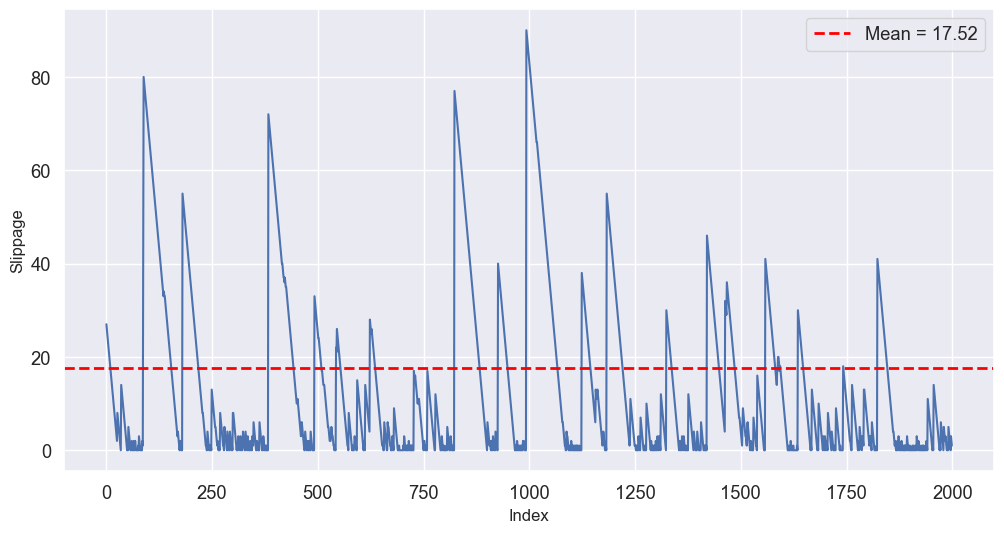

In [95]:
AAPL_data_path = r"C:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\results\csv_outputs\slippageData_AAPL.csv"
AAPL_data = pd.read_csv(AAPL_data_path)
print(AAPL_data)

mean = AAPL_data['slippage'].values.mean()
median = np.median(AAPL_data['slippage'].values)

fig = plt.figure(figsize=(12,6))
plt.plot(AAPL_data['slippage'].values[100_000:100_000 + 2000])
plt.axhline(mean, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean:.2f}")
plt.xlabel("Index", fontsize=12)
plt.ylabel("Slippage", fontsize=12)
plt.legend()
plt.show

        Unnamed: 0   index          time     ask     bid      mid  slippage
0                0      60  34800.820800  204.65  204.64  204.645         0
1                1      61  34800.836228  204.65  204.64  204.645         2
2                2      62  34800.837207  204.65  204.64  204.645         1
3                3      63  34800.839276  204.65  204.64  204.645         0
4                4      64  34800.876837  204.65  204.64  204.645         1
...            ...     ...           ...     ...     ...      ...       ...
999935      999935  999995  46294.553519  203.12  203.11  203.115         2
999936      999936  999996  46294.554050  203.12  203.11  203.115         1
999937      999937  999997  46294.554277  203.12  203.11  203.115         0
999938      999938  999998  46294.565163  203.12  203.10  203.110         1
999939      999939  999999  46294.565196  203.12  203.10  203.110         0

[999940 rows x 7 columns]


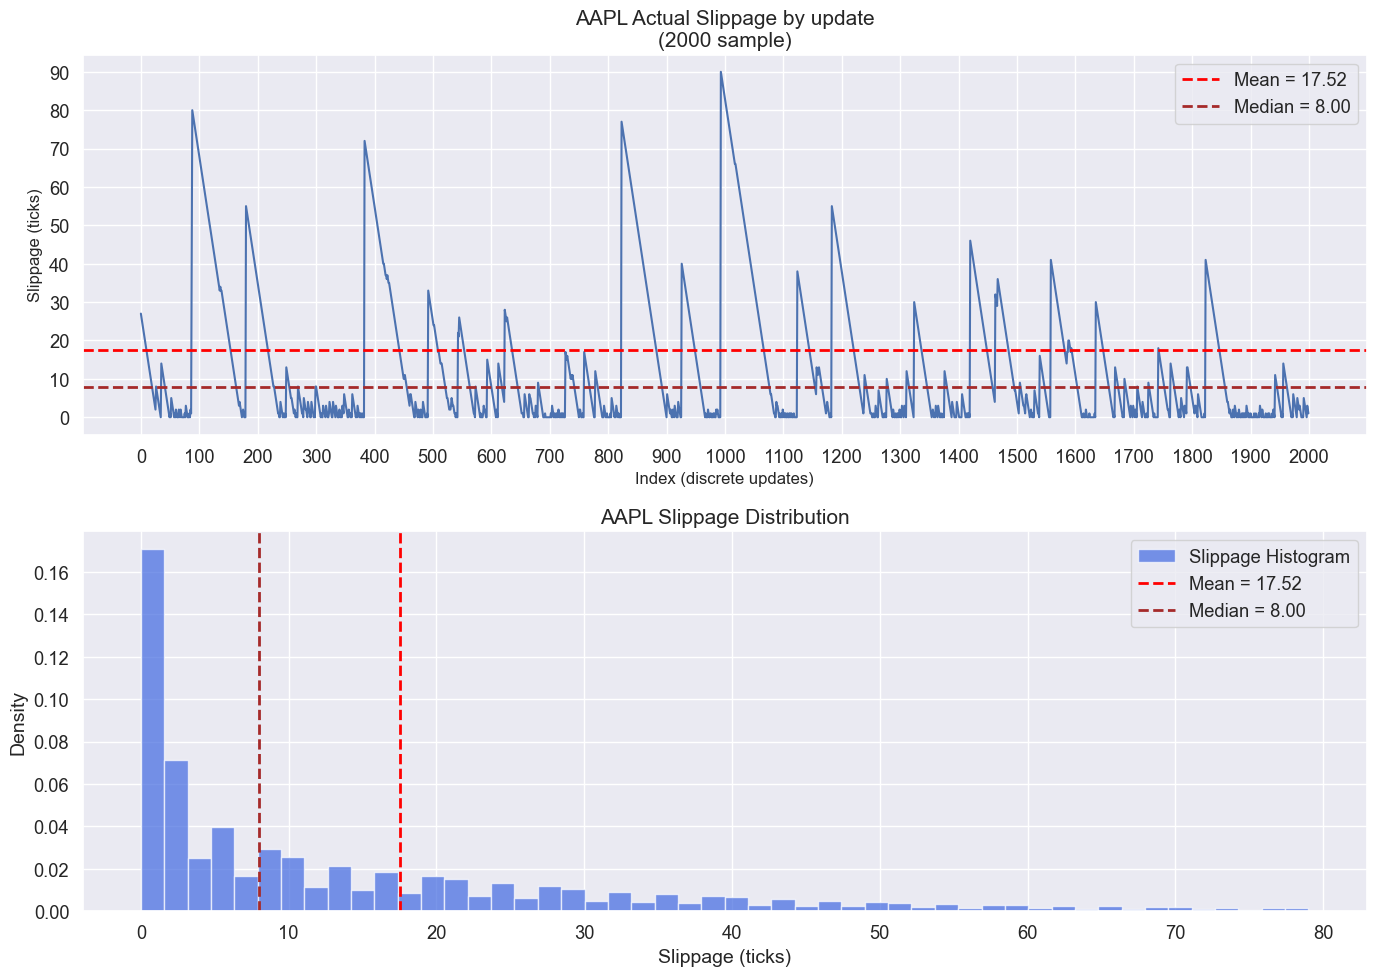

In [103]:
AAPL_data_path = r"C:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\results\csv_outputs\slippageData_AAPL.csv"
AAPL_data = pd.read_csv(AAPL_data_path)
print(AAPL_data)

mean = AAPL_data['slippage'].values.mean()
median = np.median(AAPL_data['slippage'].values)

fig, axs = plt.subplots(2, 1, figsize=(14, 10))
sns.set(font_scale=1.2)

# First subplot: slippage time series
axs[0].plot(AAPL_data['slippage'].values[100_000:100_000 + 2000])
axs[0].axhline(mean, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean:.2f}")
axs[0].axhline(median, color='brown', linestyle='--', linewidth=2, label=f"Median = {median:.2f}")
axs[0].set_xlabel("Index (discrete updates)", fontsize=12)
axs[0].set_yticks(np.arange(0, 100, 10))
axs[0].set_xticks(np.arange(0, 2100, 100))
axs[0].set_ylabel("Slippage (ticks)", fontsize=12)

axs[0].legend()
axs[0].set_title("AAPL Actual Slippage by update\n(2000 sample)", fontsize=15)

# Second subplot: slippage histogram
vals = AAPL_data['slippage'].values
hist_vals = vals[vals < 80]
axs[1].hist(hist_vals, bins=50, color="royalblue", alpha=0.7, density=True, label="Slippage Histogram")
axs[1].axvline(mean, color="red", linestyle="--", linewidth=2, label=f"Mean = {mean:.2f}")
axs[1].axvline(median, color="brown", linestyle="--", linewidth=2, label=f"Median = {median:.2f}")
axs[1].set_xlabel("Slippage (ticks)", fontsize=14)
axs[1].set_ylabel("Density", fontsize=14)
axs[1].legend()
axs[1].set_title("AAPL Slippage Histogram Distribution", fontsize=15)

plt.tight_layout()
plt.show()

In [ ]:
def expectedSlippage(data, inferenceTime = 0.00485):
    hours = 16 - 9.5
    per_second = len(data) / (hours * 3600)
    print(f"Per Second: {per_second}")
    expected_slippage = inferenceTime / (1 / per_second)
    print(f"Expected_slippage: {expected_slippage}")
    return expected_slippage

tickers = ['AAPL', 'TSLA', 'PLTR', 'GOOG']

res_expexted = []
for ticker in tickers:
    
    raw_path = fr"C:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\data\processed\{ticker}\orderbooks\unscaled\{ticker}_orderbooks_2025-06-04.csv"
    raw = pd.read_csv(raw_path)
    expected_slippage = expectedSlippage(raw)
    res_expexted.append(
        {
            'ticker': ticker,
            'expected_slippage': expected_slippage
        }
    )

print(res_expexted)

Per Second: 58.10940170940171
Expected_slippage: 0.2818305982905983
Per Second: 84.94324786324786
Expected_slippage: 0.41197475213675216
Per Second: 97.95102564102564
Expected_slippage: 0.47506247435897436
Per Second: 80.46188034188035
Expected_slippage: 0.39024011965811967
[{'ticker': 'AAPL', 'expected_slippage': 0.2818305982905983}, {'ticker': 'TSLA', 'expected_slippage': 0.41197475213675216}, {'ticker': 'PLTR', 'expected_slippage': 0.47506247435897436}, {'ticker': 'GOOG', 'expected_slippage': 0.39024011965811967}]


In [86]:
# Actual slippage mean

res_actual = []

for ticker in tickers:
    data_path = fr"C:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\results\csv_outputs\slippageData_{ticker}.csv"
    data = pd.read_csv(data_path)
    mean = data['slippage'].values.mean()
    median = np.median(data['slippage'].values)
    res_actual.append(
        {
            'ticker': ticker,
            'mean_slippage': mean,
            'median_slippage': median
        }
    )
print(res_actual)

[{'ticker': 'AAPL', 'mean_slippage': np.float64(17.51841110466628), 'median_slippage': np.float64(8.0)}, {'ticker': 'TSLA', 'mean_slippage': np.float64(11.387446744674467), 'median_slippage': np.float64(5.0)}, {'ticker': 'PLTR', 'mean_slippage': np.float64(24.065201520152016), 'median_slippage': np.float64(14.0)}, {'ticker': 'GOOG', 'mean_slippage': np.float64(17.681621162116212), 'median_slippage': np.float64(9.0)}]


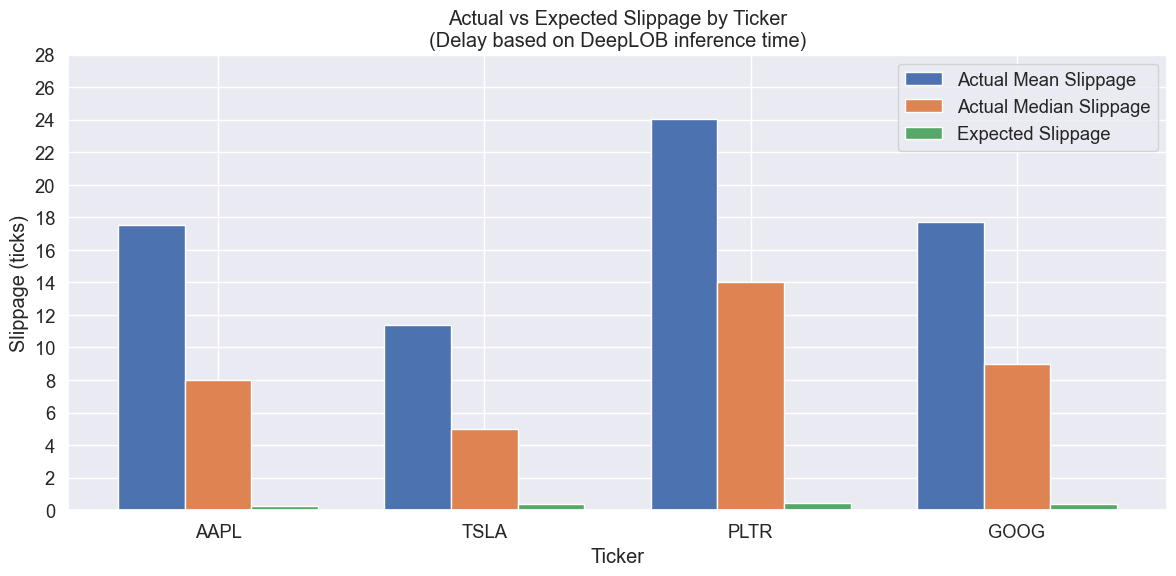

In [93]:
# Prepare data for plotting
tickers = [item['ticker'] for item in res_actual]
mean_slippage = [item['mean_slippage'] for item in res_actual]
median_slippage = [item['median_slippage'] for item in res_actual]
expected_slippage = [item['expected_slippage'] for item in res]

x = np.arange(len(tickers))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, mean_slippage, width, label='Actual Mean Slippage')
rects2 = ax.bar(x, median_slippage, width, label='Actual Median Slippage')
rects3 = ax.bar(x + width, expected_slippage, width, label='Expected Slippage')

ax.set_xlabel('Ticker')
ax.set_ylabel('Slippage (ticks)')
ax.set_title('Actual vs Expected Slippage by Ticker\n(Delay based on DeepLOB inference time)')
ax.set_xticks(x)
ax.set_xticklabels(tickers)
ax.set_yticks(np.arange(0,30, 2))
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
slippageTestPath_20 = r"C:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\results\algoSlippage\AAPL\2025-06-04\20\25\DeepLOB\data_p4hS3ONsAt.joblib"
normalTestPath_20 = r"C:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\results\algo\AAPL\2025-06-04\20\25\DeepLOB\data_rtnbGybqfu.joblib"

# ignore BIGYn and k0WmZ

slippageData = joblib.load(slippageTestPath_20)
normalData = joblib.load(normalTestPath_20)

print(normalData)

{'pnl': array([0.   , 0.   , 0.   , ..., 1.225, 1.225, 1.225]), 'directions': array([0., 0., 0., ..., 1., 1., 1.]), 'fees': None, 'slippageValues': None, 'predictions': array([0.32231289, 0.        , 0.0331631 , ..., 0.17588429, 0.20648271,
       0.23020425]), 'upper_thresh': 0.38457995653152466, 'lower_thresh': -0.1762625053524971, 'meta': {'ticker': 'AAPL', 'rowLim': 100000, 'representation': 'orderflows', 'modelClass': <class 'src.algo.algoModels.deepLOB.DeepLOB'>, 'windowLength': 100, 'signalPercentage': 25, 'date': '2025-06-04', 'horizon': 20, 'saveResults': True, 'slippage': False}}


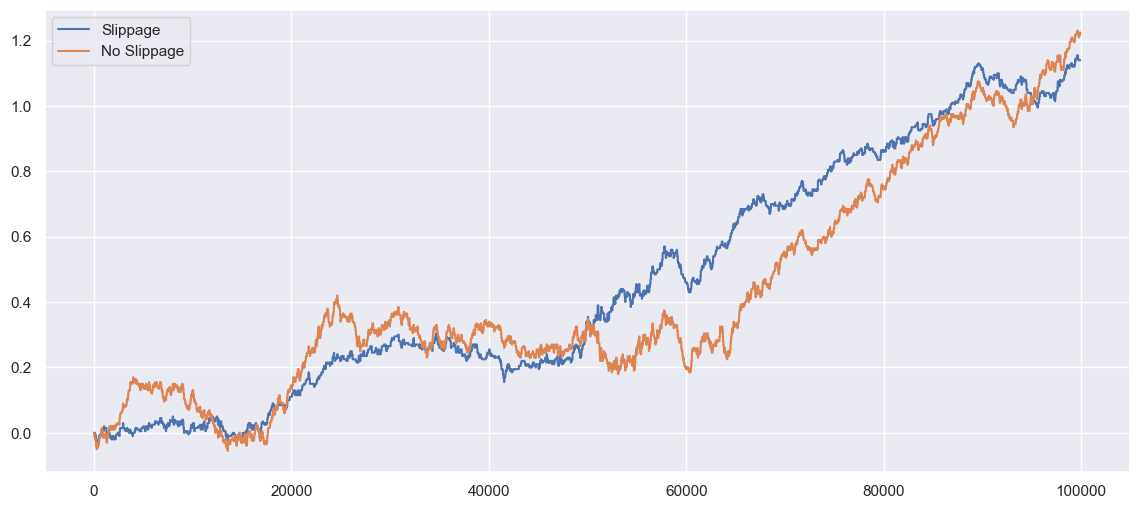

In [75]:
plt.figure(figsize=(14,6))
plt.plot(slippageData['pnl'], label="Slippage")
plt.plot(normalData['pnl'], label="No Slippage" )
plt.legend()
plt.show()

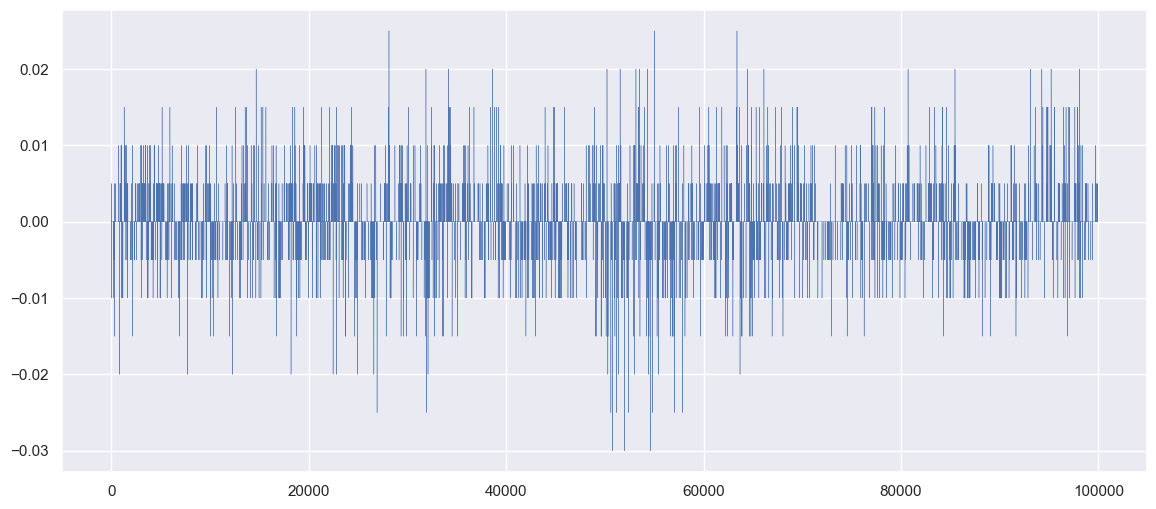

In [70]:
figure = plt.figure(figsize=(14,6))
plt.plot(slippageData['slippageValues'], linewidth=0.3)
plt.show()

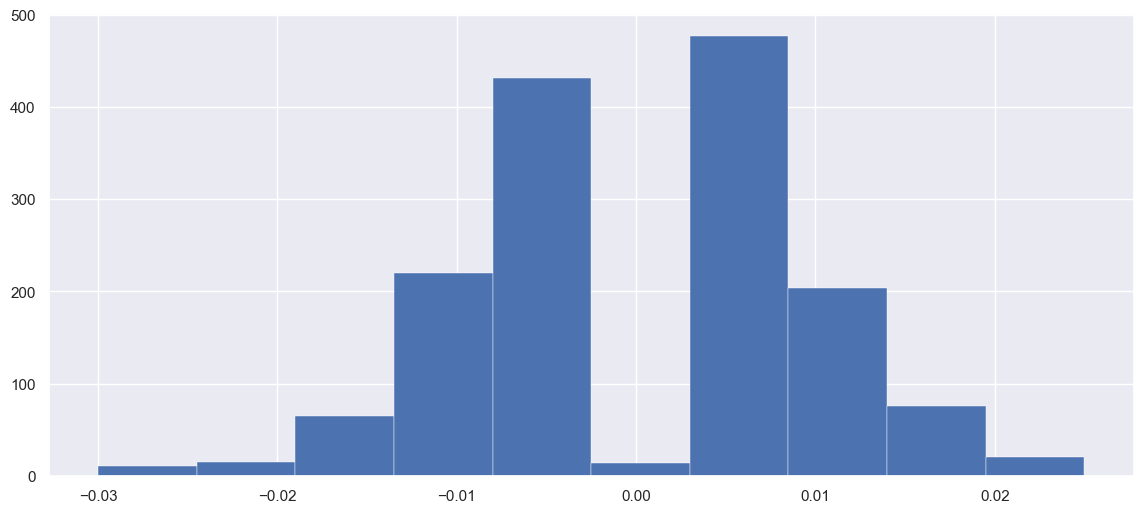

In [76]:
figure = plt.figure(figsize=(14,6))
non_zero = slippageData['slippageValues'][slippageData['slippageValues'] != 0]
plt.hist(non_zero, linewidth=0.3)
plt.show()

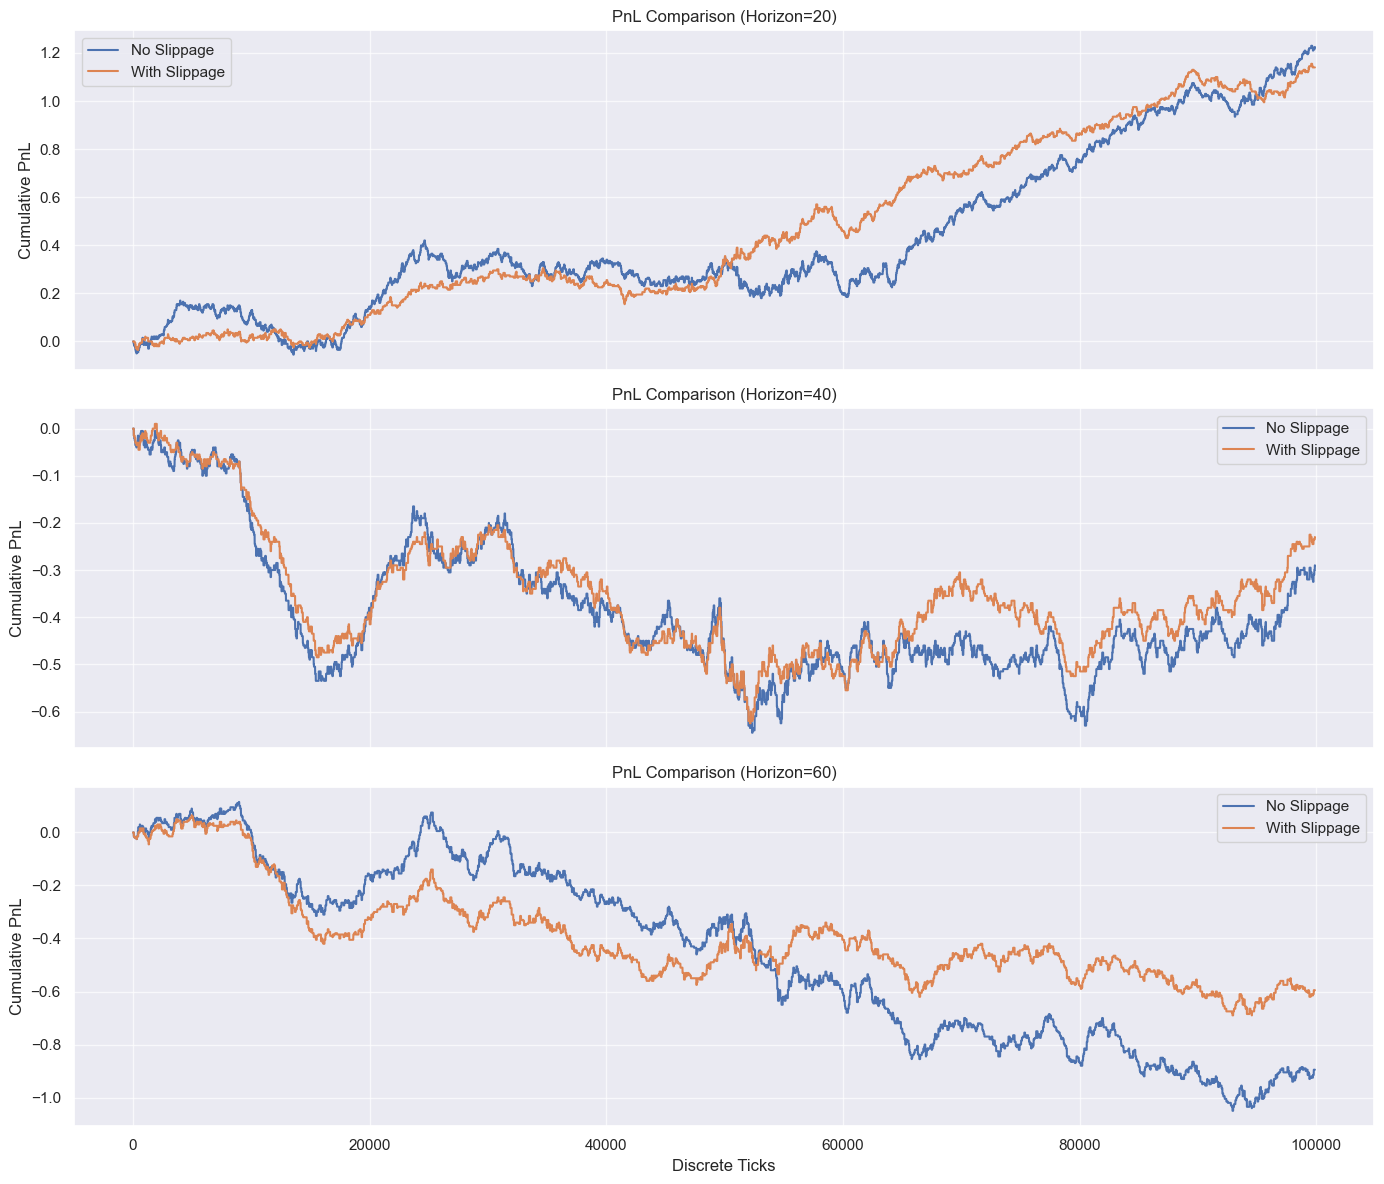

In [ ]:
slippageTestPath_20 = r"C:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\results\algoSlippage\AAPL\2025-06-04\20\25\DeepLOB\data_p4hS3ONsAt.joblib"
normalTestPath_20 = r"C:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\results\algo\AAPL\2025-06-04\20\25\DeepLOB\data_rtnbGybqfu.joblib"

slippageTestPath_40 = r"C:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\results\algoSlippage\AAPL\2025-06-04\40\25\DeepLOB\data_8UFSbgwVPV.joblib"
normalTestPath_40 = r"C:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\results\algo\AAPL\2025-06-04\40\25\DeepLOB\data_oU6pyeaI9W.joblib"

slippageTestPath_60 = r"C:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\results\algoSlippage\AAPL\2025-06-04\60\25\DeepLOB\data_Rb9fkmBvcb.joblib"
normalTestPath_60 = r"C:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\results\algo\AAPL\2025-06-04\60\25\DeepLOB\data_jwi4juKTLX.joblib"

# ignore BIGYn and k0WmZ

slippageData = joblib.load(slippageTestPath_20)
normalData = joblib.load(normalTestPath_20)

# Load all three pairs of data
slippageData_20 = joblib.load(slippageTestPath_20)
normalData_20 = joblib.load(normalTestPath_20)

slippageData_40 = joblib.load(slippageTestPath_40)
normalData_40 = joblib.load(normalTestPath_40)

slippageData_60 = joblib.load(slippageTestPath_60)
normalData_60 = joblib.load(normalTestPath_60)

rowLim = 100_000

fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# 20 horizon
axs[0].plot(normalData_20['pnl'][:rowLim], label="No Slippage")
axs[0].plot(slippageData_20['pnl'][:rowLim], label="With Slippage")
axs[0].set_title("PnL Comparison (Horizon=20)")
axs[0].set_ylabel("Cumulative PnL")
axs[0].legend()
axs[0].grid(True, alpha=0.7)

# 40 horizon
axs[1].plot(normalData_40['pnl'][:rowLim], label="No Slippage")
axs[1].plot(slippageData_40['pnl'][:rowLim], label="With Slippage")
axs[1].set_title("PnL Comparison (Horizon=40)")
axs[1].set_ylabel("Cumulative PnL")
axs[1].legend()
axs[1].grid(True, alpha=0.7)

# 60 horizon
axs[2].plot(normalData_60['pnl'][:rowLim], label="No Slippage")
axs[2].plot(slippageData_60['pnl'][:rowLim], label="With Slippage")
axs[2].set_title("PnL Comparison (Horizon=60)")
axs[2].set_xlabel("Discrete Ticks")
axs[2].set_ylabel("Cumulative PnL")
axs[2].legend()
axs[2].grid(True, alpha=0.7)

plt.tight_layout()
plt.show()

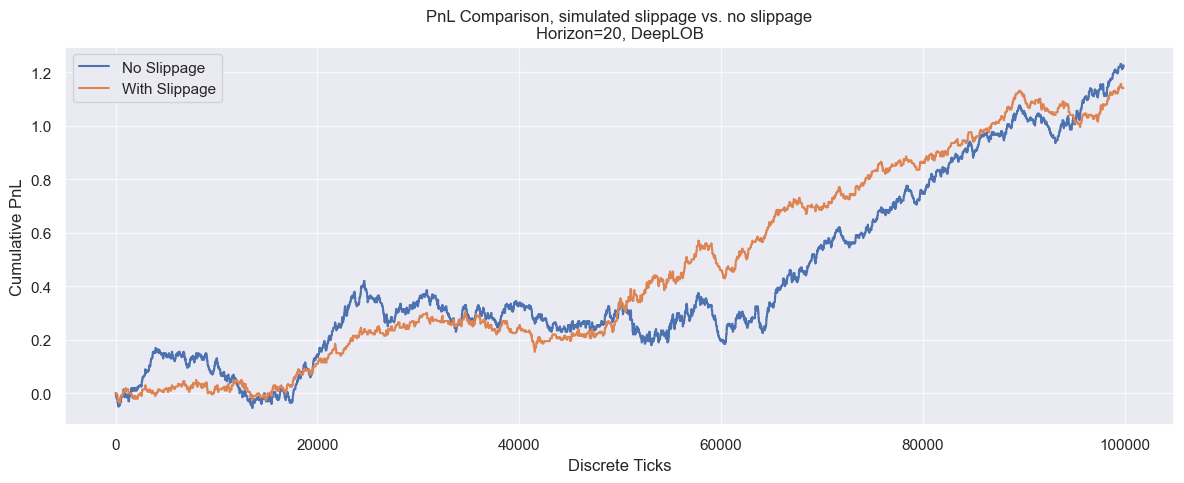

In [88]:
rowLim = 100_000

fig, ax = plt.subplots(1, 1, figsize=(12, 5), sharex=True)

# 20 horizon only
ax.plot(normalData_20['pnl'][:rowLim], label="No Slippage")
ax.plot(slippageData_20['pnl'][:rowLim], label="With Slippage")
ax.set_title("PnL Comparison, simulated slippage vs. no slippage\nHorizon=20, DeepLOB")
ax.set_ylabel("Cumulative PnL")
ax.legend()
ax.grid(True, alpha=0.7)
ax.set_xlabel("Discrete Ticks")

plt.tight_layout()
plt.show()

In [81]:
# Ratio functions 
import numpy as np

def compute_returns(pnl):
    """Convert PnL series into step returns (differences)."""
    return np.diff(pnl)


def volatility(returns, periods_per_year=None):
    """Volatility (std of returns). Optionally annualized."""
    vol = np.std(returns, ddof=1)
    return vol * np.sqrt(periods_per_year) if periods_per_year else vol


def sharpe_ratio(returns, risk_free=0.0, periods_per_year=None):
    """Sharpe ratio. Optionally annualized."""
    excess = returns - risk_free
    mean_return = np.mean(excess)
    vol = np.std(excess, ddof=1)
    sharpe = mean_return / vol if vol > 0 else np.nan
    return sharpe * np.sqrt(periods_per_year) if periods_per_year else sharpe


def sortino_ratio(returns, risk_free=0.0, periods_per_year=None):
    """Sortino ratio (downside risk only)."""
    excess = returns - risk_free
    downside = excess[excess < 0]
    downside_std = np.std(downside, ddof=1)
    mean_return = np.mean(excess)
    sortino = mean_return / downside_std if downside_std > 0 else np.nan
    return sortino * np.sqrt(periods_per_year) if periods_per_year else sortino


def max_drawdown(pnl):
    """Maximum drawdown from cumulative PnL series."""
    running_max = np.maximum.accumulate(pnl)
    drawdown = pnl - running_max
    return np.min(drawdown)


def calmar_ratio(pnl, periods_per_year=None):
    """Calmar ratio = annualized return / |max drawdown|."""
    returns = np.diff(pnl)
    cumulative_return = np.sum(returns) / len(pnl)
    annualized_return = cumulative_return * periods_per_year if periods_per_year else cumulative_return
    mdd = abs(max_drawdown(pnl))
    return annualized_return / mdd if mdd > 0 else np.nan

In [82]:
# Results path
from src.core.generalUtils import saveAlgoDictLocation

def getAlgoResultsData(ticker, modelName, horizon, date, signalPercentage):
    location = saveAlgoDictLocation(ticker=ticker, modelName=modelName, horizon=horizon, date=date, signalPercentage=signalPercentage)
    files = glob.glob(f"{location}/*")
    assert len(files) == 1, f"There are {len(files)} in {location}, please review"
    file = files[0]
    content = joblib.load(file)
    return content


In [90]:
ticker = 'AAPL'
rowLim = 100_000
horizon=40
date='2025-06-04'
signalPercentage = 25

data_list = [normalData_20, slippageData_20]

for index, data in enumerate(data_list):
    # data = getAlgoResultsData(ticker=ticker, modelName=modelName, horizon=horizon, date=date, signalPercentage=signalPercentage)
    returns = np.diff(data['pnl'][:rowLim])

    AAPL_per_second = 60
    timeLength =  len(returns) / AAPL_per_second
    days_per_year = 252
    periods_per_year = days_per_year * (16-9.5) * 3600 / timeLength
    periods_per_year

    name = "Slipapge" if index == 1 else "No - Slippage"
    
    print(f"{'='*15} {name} {'='*15}")

    vol = volatility(returns, periods_per_year)
    print(f"Volatility: {vol:.4f}")

    sharpe = sharpe_ratio(returns=returns, periods_per_year=periods_per_year)
    print(f"Sharpe: {sharpe:.4f}")

    sortino = sortino_ratio(returns=returns, periods_per_year=periods_per_year)
    print(f"Sortino: {sortino:.4f}")

    mdd = max_drawdown(returns)
    print(f"Max Drawdown: {mdd:.4f}")

    calmar = calmar_ratio(returns, periods_per_year=periods_per_year)
    print(f"Calmar: {calmar:.4f}")



=============== No - Slippage ===============
Volatility: 0.0794
Sharpe: 0.5471
Sortino: 0.1660
Max Drawdown: -0.0650
Calmar: 0.0000
=============== Slipapge ===============
Volatility: 0.0604
Sharpe: 0.6687
Sortino: 0.1664
Max Drawdown: -0.0650
Calmar: 0.0000


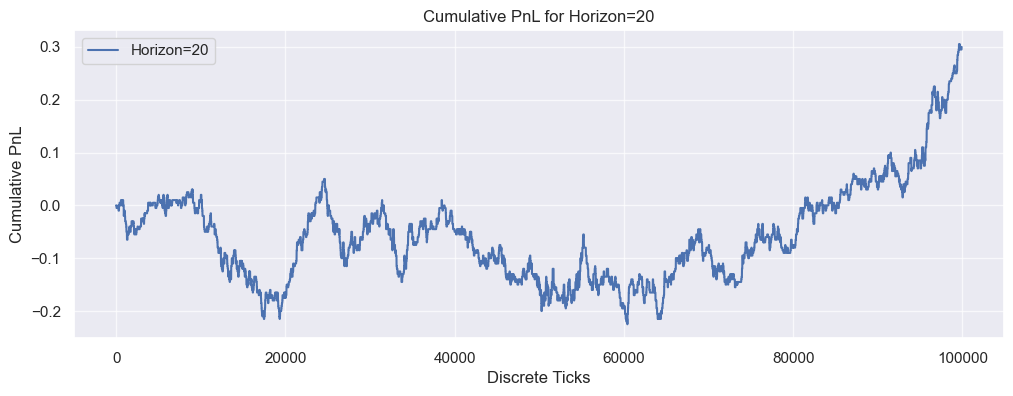

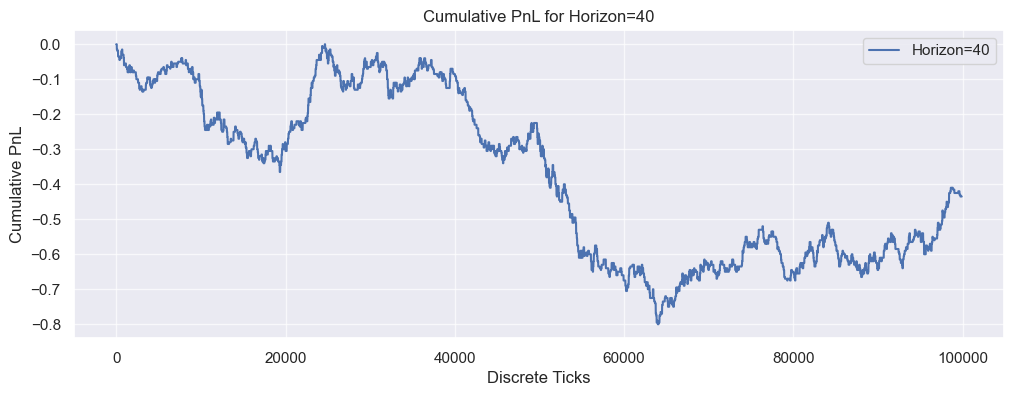

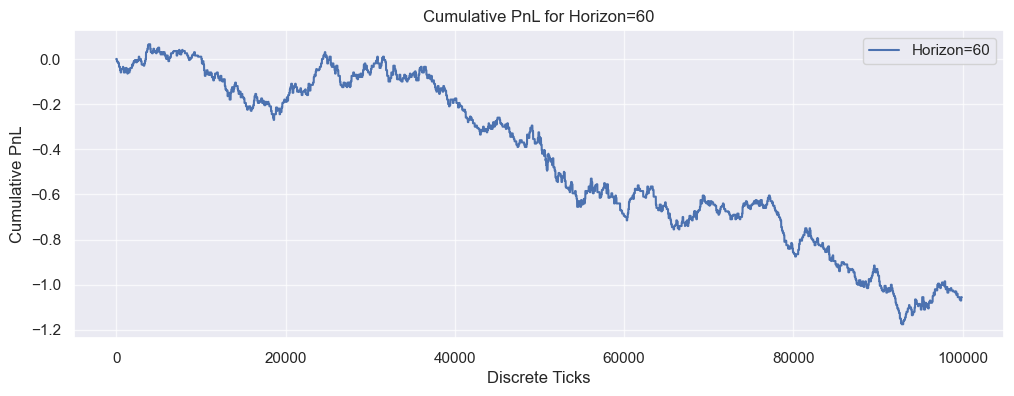

In [86]:
# Testing
horizons = [20,40,60]
ticker='AAPL'
signalPercentage = 10
modelName = 'DeepLOB'
date='2025-06-04'
for horizon in horizons:
    data = getAlgoResultsData(ticker=ticker, modelName=modelName, horizon=horizon, date=date, signalPercentage=signalPercentage)
    plt.figure(figsize=(12, 4))
    plt.plot(data['pnl'], label=f'Horizon={horizon}')
    plt.title(f'Cumulative PnL for Horizon={horizon}')
    plt.xlabel('Discrete Ticks')
    plt.ylabel('Cumulative PnL')
    plt.legend()
    plt.grid(True, alpha=0.7)
    plt.show()

In [3]:
from src.routers.modelRouter import DeepLOB_TF

model = DeepLOB_TF()
model.model.summary()

c:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 100, 40,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 100, 20,   │         96 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 100, 20,   │          0 │ conv2d[0][0]      │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 100, 20,   │      4,128 │ leaky_re_lu[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 100, 20,   │          0 │ conv2d_1[0][0]    │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 100, 20,   │      4,128 │ leaky_re_lu_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 100, 20,   │          0 │ conv2d_2[0][0]    │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 100, 10,   │      2,080 │ leaky_re_lu_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_3       │ (None, 100, 10,   │          0 │ conv2d_3[0][0]    │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 100, 10,   │      4,128 │ leaky_re_lu_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_4       │ (None, 100, 10,   │          0 │ conv2d_4[0][0]    │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 100, 10,   │      4,128 │ leaky_re_lu_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_5       │ (None, 100, 10,   │          0 │ conv2d_5[0][0]    │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 100, 1,    │     10,272 │ leaky_re_lu_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_6       │ (None, 100, 1,    │          0 │ conv2d_6[0][0]    │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 100, 1,    │      4,128 │ leaky_re_lu_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_7       │ (None, 100, 1,    │          0 │ conv2d_7[0][0]  

 Total params: 142,435 (556.39 KB)

 Trainable params: 142,435 (556.39 KB)

 Non-trainable params: 0 (0.00 B)